## Test Image Masking
__Try to replace pure white pixels with other colors__

In [174]:
import os
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

from sklearn.metrics.pairwise import cosine_similarity

from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model, Model

%matplotlib inline

__Load Models__

In [175]:
watch_df = pd.read_csv('all_watch_info_with_indicators.csv')

In [176]:
f_path = 'all_pics/'
f_list = os.listdir(f_path)

In [177]:
mask_path = 'all_masks/'
mask_files = os.listdir(mask_path)

In [273]:
def prepare_image(image_name):
    im_watch = Image.open(image_name)
    im_watch = im_watch.resize((299,299))
    im_watch_array = np.array(im_watch)
    
    return im_watch_array

In [179]:
def prepare_image_with_mask(image_name, mask_name):
    im_watch = Image.open(image_name)
    im_watch = im_watch.resize((299,299))
    im_watch_array = np.array(im_watch)
    
    im_mask = Image.open(mask_name)
    im_mask = im_mask.resize((im_watch.size))
    im_mask_array = np.array(im_mask)
    
    is_white = (im_watch_array[:,:,0]>252) & \
        (im_watch_array[:,:,1]>250) & \
        (im_watch_array[:,:,1]>250) 
    
    is_white = np.dstack((is_white,is_white,is_white))
    
    im_watch_array[is_white == 1] = im_mask_array[is_white == 1]
    
    return im_watch_array

In [261]:
watch_f = f_path + np.random.choice(f_list)
mask_f =  mask_path + np.random.choice(mask_files)

In [288]:
im_watch_array = prepare_image_with_mask(watch_f,mask_f)
#im_watch_array = prepare_image(image_name=watch_f)

(-0.5, 298.5, 298.5, -0.5)

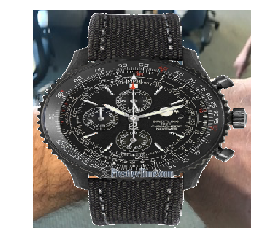

In [289]:
imgplot = plt.imshow(im_watch_array)
plt.axis('off')


__Test Recommendations__

In [290]:
good_files = []
for filename in glob.iglob('multi_class_testing/**/**/*.jpg', recursive=True):
    good_files.append(filename)

In [291]:
for filename in good_files:
    
    new_file = 'binary_gender_masked/'
    check_mask = np.random.uniform(0,1)
    if check_mask > 0.5:
        good_files[0].split('/',1)
        

In [292]:
np.random.uniform(0,1)

0.26927703710076634

In [293]:
good_files[0].split('/',1)

['multi_class_testing',
 'train/male/6738_LonginesTheSaintImierChronograph41mmL27528723.jpg']

In [294]:
datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=90,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [295]:
#! rm preview_masked_photos/*.jpg

In [296]:
#im_watch_array = im_watch_array.swapaxes(0,2).swapaxes(1,2)
im_watch_array = im_watch_array.reshape((1,) + im_watch_array.shape)

In [297]:
# i = 0
# for batch in datagen.flow(x=im_watch_array, batch_size=1,
#                           save_to_dir='preview_masked_photos',
#                           save_prefix='breitling',
#                           save_format='jpg'):
#     i += 1
#     if i > 5:
#         break

# p_photos = os.listdir('preview_masked_photos')

In [298]:
# p_photos

In [299]:
# im_watch = Image.open('preview_masked_photos/' + p_photos[2])

In [300]:
# im_watch